In [1]:
import pandas as pd

In [2]:
source = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'
files = {
    'confirmed': 'time_series_19-covid-Confirmed.csv',
    'deaths': 'time_series_19-covid-Deaths.csv',
    'recovered': 'time_series_19-covid-Recovered.csv'
}

In [3]:
# load all three dataframes
source_df = {}
for key, file in files.items():
    source_df[key] = pd.read_csv(source+file) \
        .drop(['Lat', 'Long', 'Province/State'], axis=1) \
        .melt(id_vars=['Country/Region']) \
        .groupby(['Country/Region', 'variable']).sum() \
        .reset_index() \
        .set_index(['Country/Region', 'variable'])

In [4]:
# join datasets
df = source_df['confirmed']. \
    join(source_df['deaths'], rsuffix='_deaths'). \
    join(source_df['recovered'], rsuffix='_recovered'). \
    reset_index()

In [5]:
# set column namesb
df.columns = ['country', 'date_string', 'confirmed', 'deaths', 'recovered']

In [6]:
# parse date
df['date'] = pd.to_datetime(df['date_string'])
df['date_string'] = df['date'].dt.strftime('%d. %b')
#df = df.drop('date_string', axis=1)

In [7]:
# sort by date
df = df.sort_values(by=['date', 'country'])

In [8]:
germany_all = df[df['country'] == 'Germany']
germany_base = df[(df['country'] == 'Germany') & (df['date'] > '2020-02-24')]

In [16]:
# Logartithmic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(range(germany_base['confirmed']), germany_base['confirmed'])

ModuleNotFoundError: No module named 'sklearn'

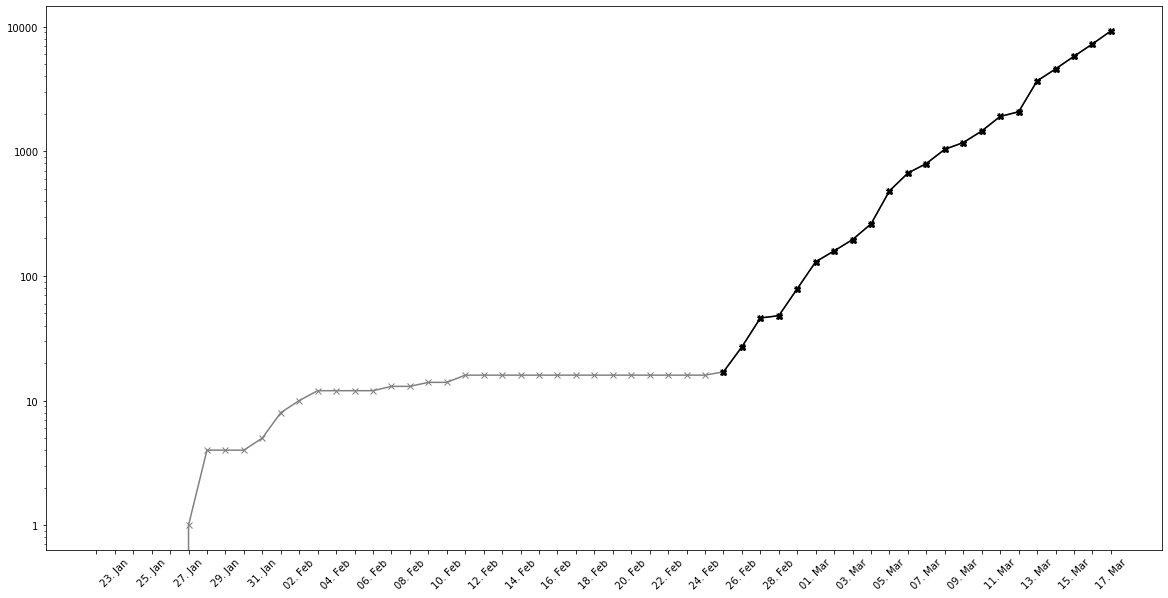

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(germany_all['date_string'], germany_all['confirmed'], marker='x', color='gray')
ax.plot(germany_base['date_string'], germany_base['confirmed'], marker='X', color='black')
ax.set_yscale('log')
ax.set_xticklabels(labels=germany_all['date_string'], rotation=45)
ax.yaxis.set_major_formatter(ScalarFormatter())
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()